In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Load data
df = pd.read_csv('WalmartSales.csv', parse_dates=['date'], index_col=['date'])

# Check the data
print(df.columns)
print(df.head())

# Plot the data
df.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Sales Forecasting")
plt.show()

# Create features
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

# Confirm the results of the split
print(df.columns)
print(df.head())

# Visualize target/feature relationship by date
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='Sales')  # Adjusted 'Profit' to 'Sales'
ax.set_title("Sales Forecasting by Year")
plt.show()

# Convert or aggregate daily to monthly sales
ts = df['Sales'].resample('M').sum()

# Plot the new dataset
ts.plot()

# Determine the number of months in the dataset
print(len(ts))

# Set train and test data
train = ts[:int(len(ts) * 0.8)]
test = ts[int(len(ts) * 0.8):]

# Set the parameters for ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 0, 4)).fit()

# Create the model
pred = model.predict(start=len(train), end=(len(ts) - 1))

# Evaluate the model - Check the MSE
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test, pred))

# Check the results
print("Forecast Error:", error)

# Plot the results
plt.figure(figsize=(10, 6))
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', alpha=0.7)
plt.show()

# Forecasting another 24 months
final_model = ARIMA(ts, order=(5, 0, 4)).fit()
prediction = final_model.predict(start=len(ts), end=(len(ts) + 24))

# Plot the results
plt.figure(figsize=(10, 6))
ts.plot(legend=True, label='Historical')
prediction.plot(legend=True, label='Forecast')
plt.show()


ValueError: Missing column provided to 'parse_dates': 'date'

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_63692/4273572713.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])


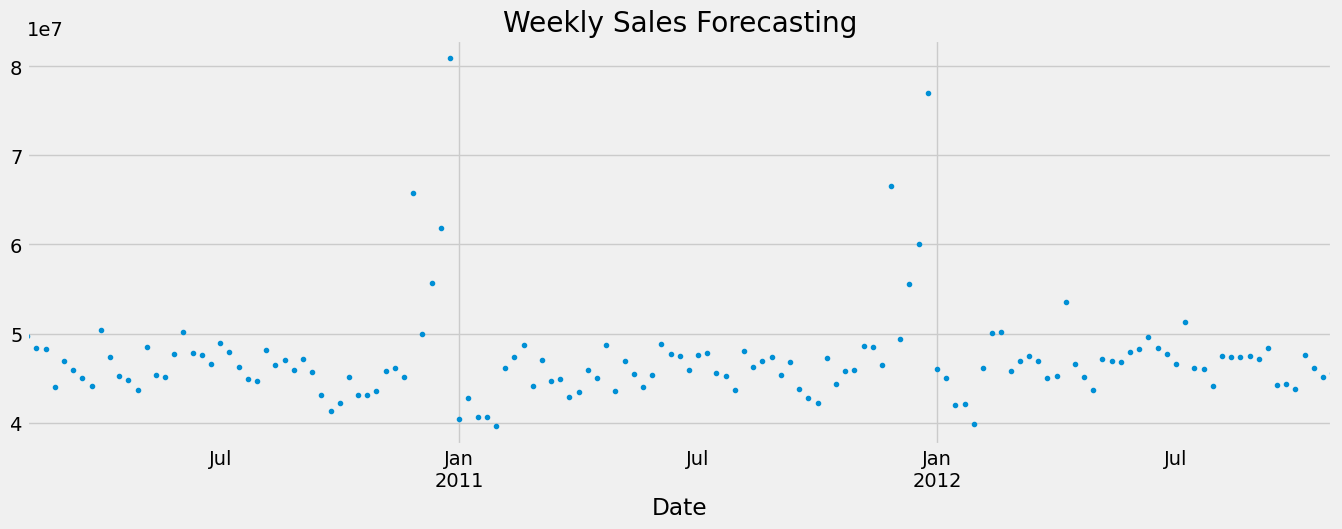

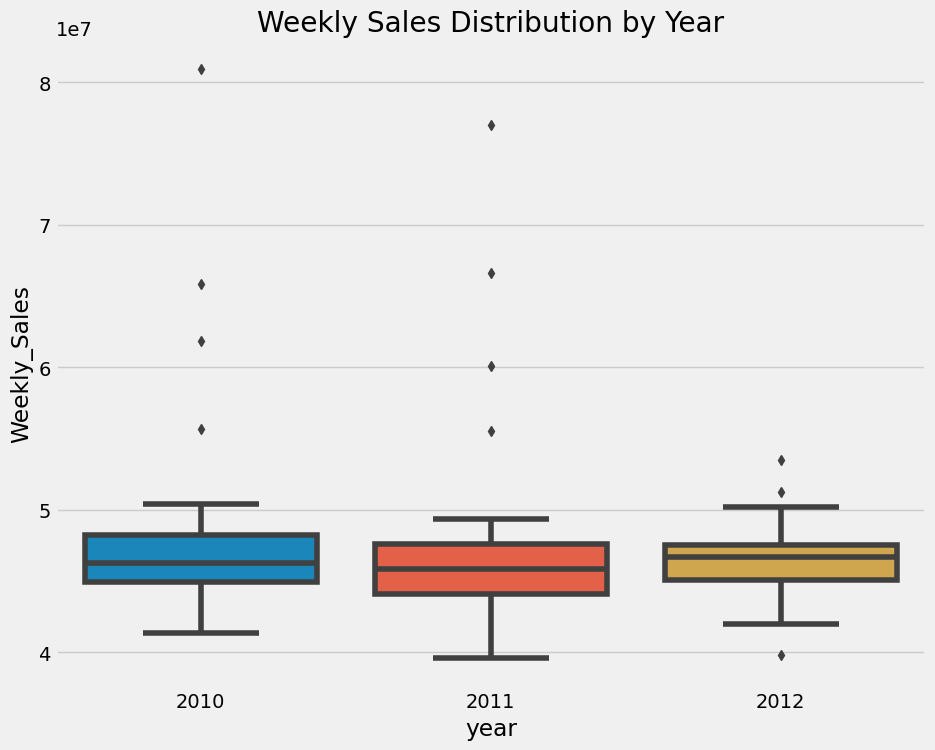

/Users/rodri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Forecast Error (RMSE): 2575084.3262871737


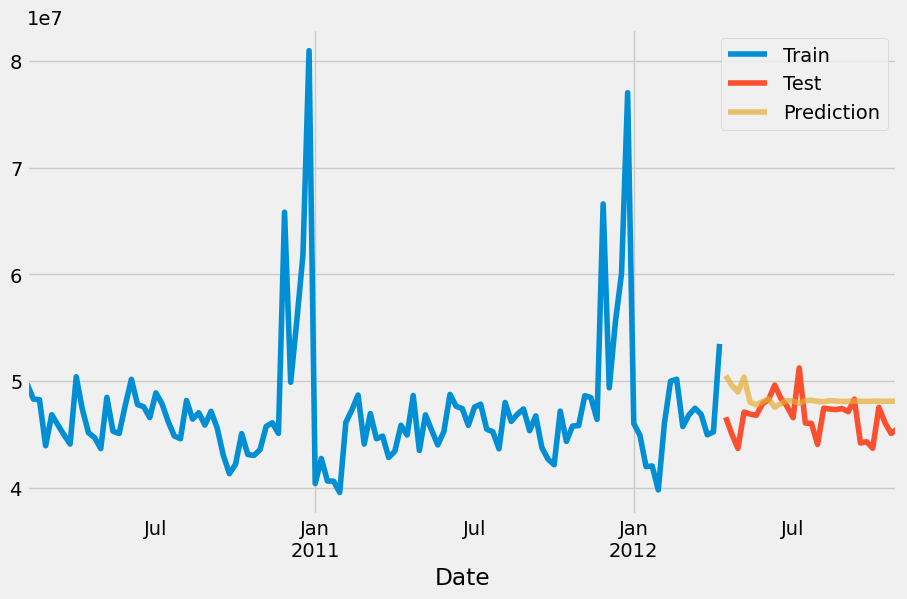

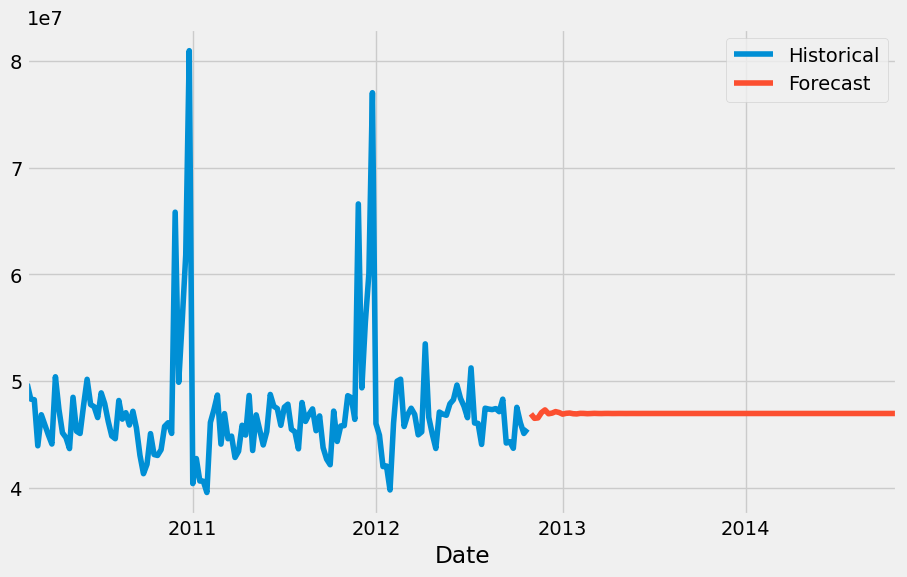

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the plot style
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Resample the data to get weekly sales totals if the data contains multiple sales entries per date
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Check the data by plotting
weekly_sales.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Weekly Sales Forecasting")
plt.show()

# Define function to create time-based features
def create_features(df):
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

# Create time-based features
features = create_features(weekly_sales.to_frame())

# Plot sales by year as a boxplot to visualize distribution
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=features, x='year', y='Weekly_Sales')
ax.set_title("Weekly Sales Distribution by Year")
plt.show()

# Prepare data for forecasting
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Build and fit the ARIMA model
model = ARIMA(train, order=(5, 1, 4)).fit()

# Forecast and calculate error
pred = model.predict(start=len(train), end=len(weekly_sales)-1, typ='levels')
error = np.sqrt(mean_squared_error(test, pred))

# Display forecast error
print("Forecast Error (RMSE):", error)

# Plot historical data and forecasts
plt.figure(figsize=(10, 6))
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', alpha=0.7)
plt.show()

# Forecasting additional 24 months
final_model = ARIMA(weekly_sales, order=(5, 1, 4)).fit()
prediction = final_model.predict(start=len(weekly_sales), end=len(weekly_sales) + 104)  # 24 months, assuming 4 weeks/month

# Plot the results
plt.figure(figsize=(10, 6))
weekly_sales.plot(legend=True, label='Historical')
prediction.plot(legend=True, label='Forecast')
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('/mnt/data/WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Plot the data
weekly_sales.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Weekly Sales")
plt.show()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Summarize the model
print(model.summary())

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error
pred = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred))

# Display the forecast error
print("Forecast Error (RMSE):", error)

# Plot the predictions
plt.figure(figsize=(10, 6))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
plt.plot(test.index, pred, label='Predicted', alpha=0.7, legend=True)
plt.title('Weekly Sales Prediction')
plt.show()

# Extended forecast beyond the current data
future_forecast = model.predict(n_periods=104)  # Forecasting for 24 months assuming 4 weeks/month

# Plot the extended forecast
plt.figure(figsize=(10, 6))
weekly_sales.plot(label='Historical', legend=True)
future_index = pd.date_range(start=weekly_sales.index[-1], periods=105, freq='W')[1:]
plt.plot(future_index, future_forecast, label='Future Forecast', alpha=0.7, legend=True)
plt.title('Future Sales Forecast')
plt.show()


ModuleNotFoundError: No module named 'pmdarima'

In [4]:
pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/f9/24/d61c400452bed35dc8ccd183bcb2a008154f855b55b7a61cb0fa48872bbd/pmdarima-2.0.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/05/69/198e26fb362a35460cbc72596352228fb8bddb15d11a787acfd7fa30aec4/Cython-3.0.10-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.1/652.1 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('/mnt/data/WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Plot the data
weekly_sales.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Weekly Sales")
plt.show()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Summarize the model
print(model.summary())

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error
pred = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred))

# Display the forecast error
print("Forecast Error (RMSE):", error)

# Plot the predictions
plt.figure(figsize=(10, 6))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
plt.plot(test.index, pred, label='Predicted', alpha=0.7, legend=True)
plt.title('Weekly Sales Prediction')
plt.show()

# Extended forecast beyond the current data
future_forecast = model.predict(n_periods=104)  # Forecasting for 24 months assuming 4 weeks/month

# Plot the extended forecast
plt.figure(figsize=(10, 6))
weekly_sales.plot(label='Historical', legend=True)
future_index = pd.date_range(start=weekly_sales.index[-1], periods=105, freq='W')[1:]
plt.plot(future_index, future_forecast, label='Future Forecast', alpha=0.7, legend=True)
plt.title('Future Sales Forecast')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/WalmartSales.csv'

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_63692/1289144200.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])


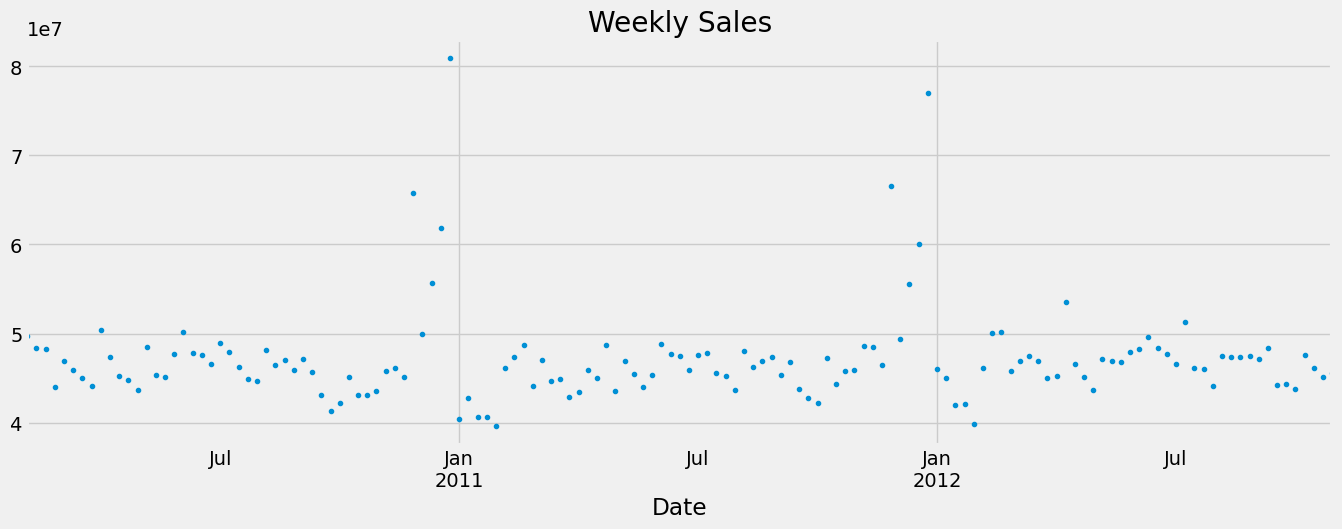

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.753, Time=8.38 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.688, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.374, Time=1.57 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.921, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.771, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=4.07 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.806, Time=4.28 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.544, Time=0.24 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.794, Time=23.04 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4772.825, Time=36.92 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.846, Time=3.00 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.470, Time=4.67 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.150, Time=5.48 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.838, Time=4.60 sec
 ARIMA(1,0,1)(1,0,0)[5

AttributeError: Line2D.set() got an unexpected keyword argument 'legend'

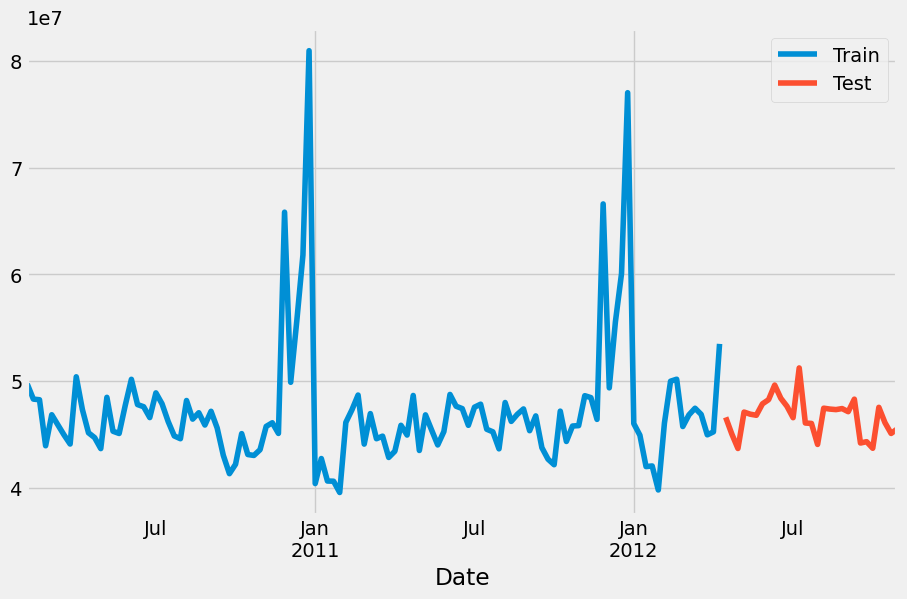

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Plot the data
weekly_sales.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Weekly Sales")
plt.show()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Summarize the model
print(model.summary())

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error
pred = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred))

# Display the forecast error
print("Forecast Error (RMSE):", error)

# Plot the predictions
plt.figure(figsize=(10, 6))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
plt.plot(test.index, pred, label='Predicted', alpha=0.7, legend=True)
plt.title('Weekly Sales Prediction')
plt.show()

# Extended forecast beyond the current data
future_forecast = model.predict(n_periods=104)  # Forecasting for 24 months assuming 4 weeks/month

# Plot the extended forecast
plt.figure(figsize=(10, 6))
weekly_sales.plot(label='Historical', legend=True)
future_index = pd.date_range(start=weekly_sales.index[-1], periods=105, freq='W')[1:]
plt.plot(future_index, future_forecast, label='Future Forecast', alpha=0.7, legend=True)
plt.title('Future Sales Forecast')
plt.show()


/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_63692/3405661677.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])


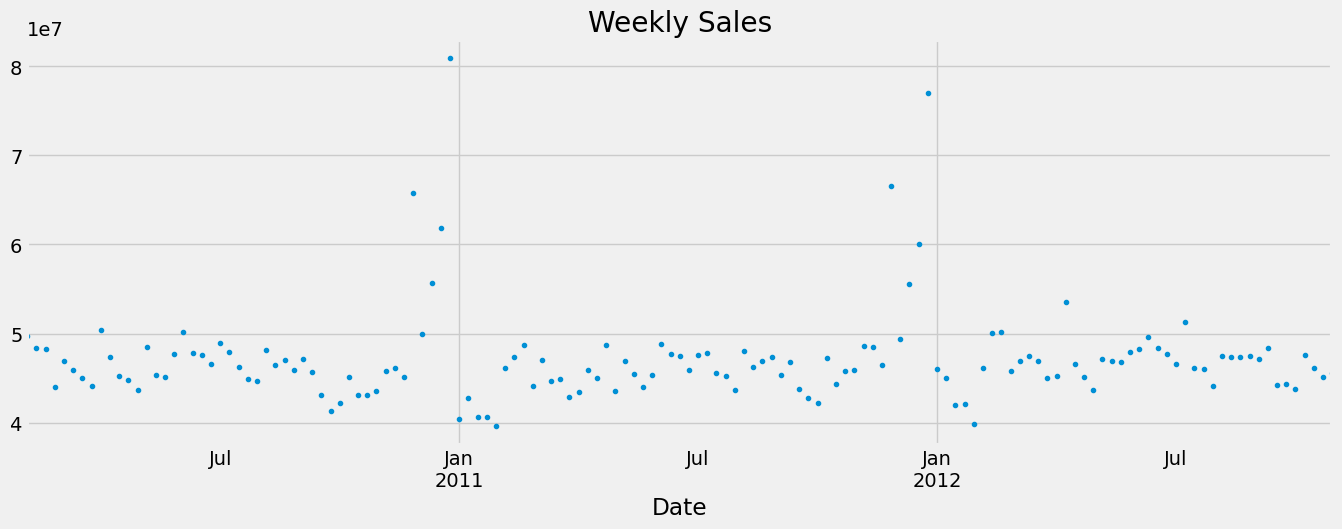

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.753, Time=7.53 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.688, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.374, Time=1.82 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.921, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.771, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.806, Time=3.36 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.544, Time=0.21 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.794, Time=20.27 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4772.825, Time=34.38 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.846, Time=2.90 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.470, Time=4.14 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.150, Time=5.90 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.838, Time=5.12 sec
 ARIMA(1,0,1)(1,0,0)[5

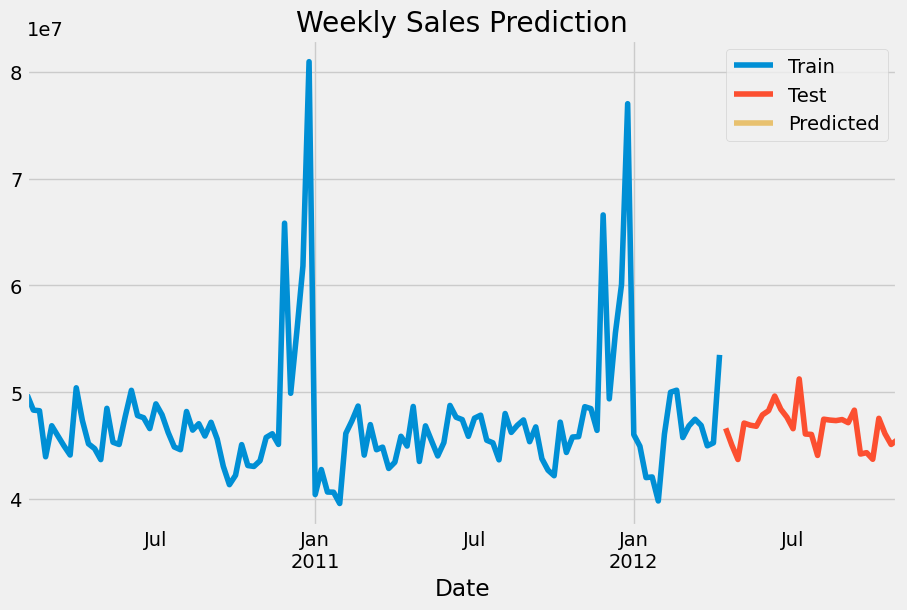

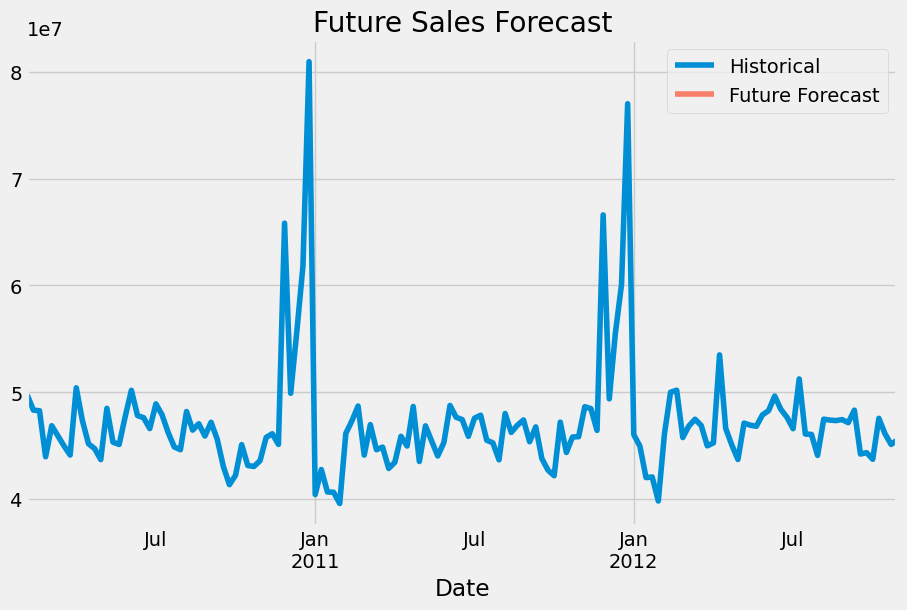

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Plot the data
weekly_sales.plot(style=".", figsize=(15, 5), color=color_pal[0], title="Weekly Sales")
plt.show()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Summarize the model
print(model.summary())

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error
pred = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred))

# Display the forecast error
print("Forecast Error (RMSE):", error)

# Plot the predictions
plt.figure(figsize=(10, 6))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
plt.plot(test.index, pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Weekly Sales Prediction')
plt.show()

# Extended forecast beyond the current data
future_forecast = model.predict(n_periods=104)  # Forecasting for 24 months assuming 4 weeks/month

# Plot the extended forecast
plt.figure(figsize=(10, 6))
weekly_sales.plot(label='Historical', legend=True)
future_index = pd.date_range(start=weekly_sales.index[-1], periods=105, freq='W')[1:]
plt.plot(future_index, future_forecast, label='Future Forecast', alpha=0.7)
plt.legend()
plt.title('Future Sales Forecast')
plt.show()


/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_63692/711855867.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.753, Time=7.00 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.688, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.374, Time=0.97 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.921, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.771, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.806, Time=3.56 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.544, Time=0.20 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.794, Time=21.47 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4772.825, Time=33.18 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.846, Time=2.78 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.470, Time=4.70 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.150, Time=7.95 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.838, Time=6.44 sec
 ARIMA(1,0,1)(1,0,0)[5

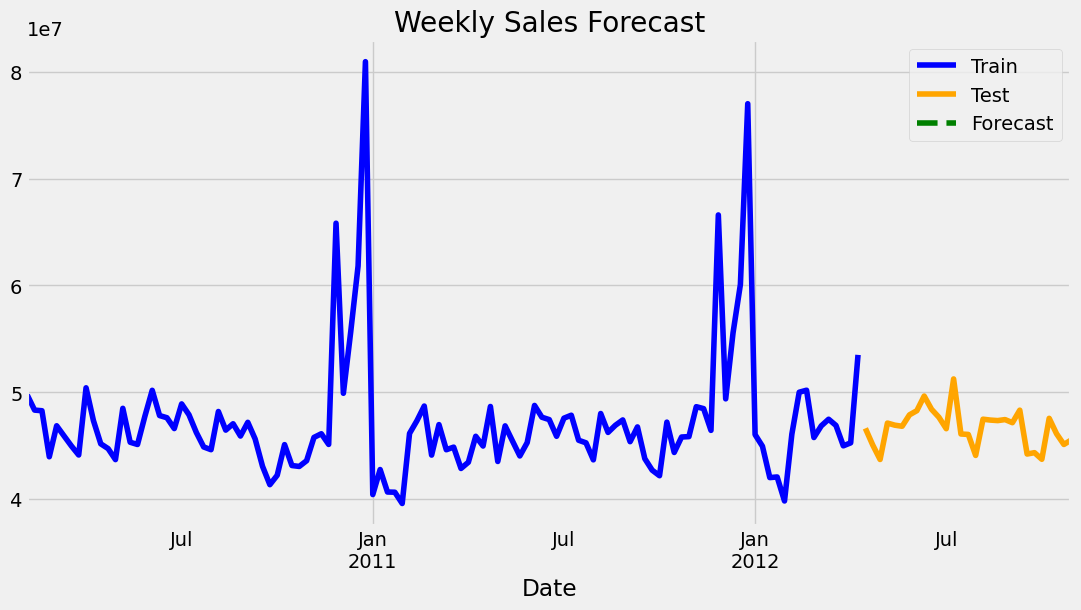

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error on the test set
pred_test = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred_test))

# Display the forecast error
print("Forecast Error (RMSE) on Test Set:", error)

# Forecasting additional 24 months
future_forecast = model.predict(n_periods=24 * 4)  # Assuming 4 weeks per month

# Generate future dates for plotting the forecast
last_date = weekly_sales.index[-1]
future_dates = pd.date_range(start=last_date, periods=24 * 4 + 1, freq='W')[1:]

# Combine the historical and forecasted data
forecast_index = test.index.append(future_dates)
forecast_data = np.concatenate((pred_test, future_forecast))

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))
train.plot(label='Train', color='blue')
test.plot(label='Test', color='orange')
plt.plot(forecast_index, forecast_data, label='Forecast', color='green', linestyle='--')
plt.legend()
plt.title('Weekly Sales Forecast')
plt.show()


/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_63692/711855867.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.753, Time=6.74 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.688, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.374, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.921, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.771, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=3.32 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.806, Time=3.77 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.544, Time=0.20 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.794, Time=28.02 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4772.825, Time=40.51 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.846, Time=3.15 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.470, Time=4.48 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.150, Time=5.74 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.838, Time=4.53 sec
 ARIMA(1,0,1)(1,0,0)[5

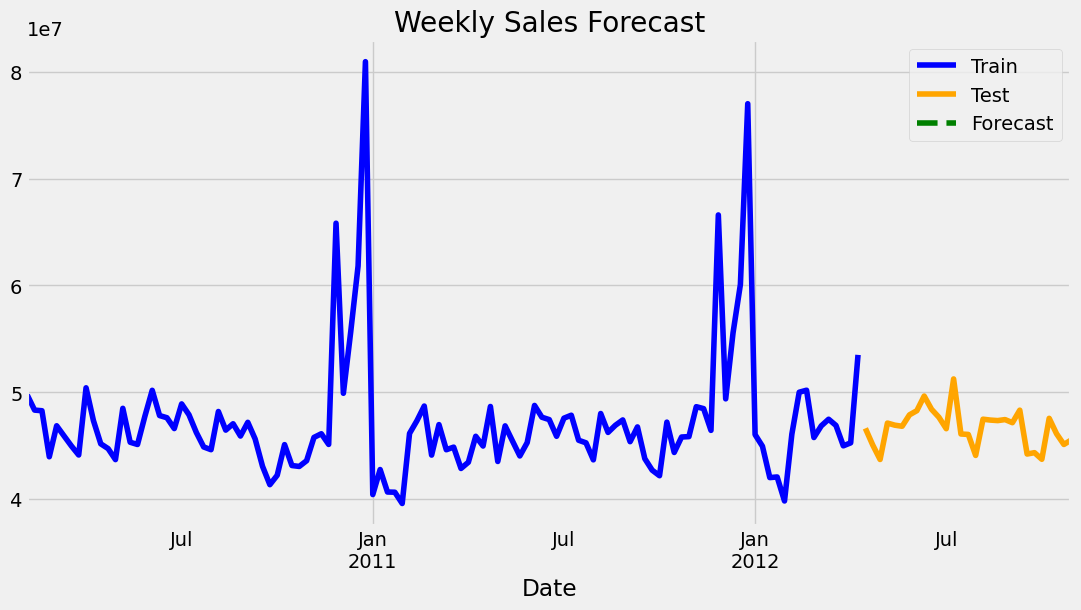

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Set the plot style
plt.style.use('fivethirtyeight')

# Load data and parse dates
df = pd.read_csv('WalmartSales.csv', parse_dates=['Date'], date_parser=pd.to_datetime, index_col=['Date'])

# Aggregate data weekly
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Auto ARIMA model to find the best parameters
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# Split data into train and test sets
train = weekly_sales[:int(len(weekly_sales) * 0.8)]
test = weekly_sales[int(len(weekly_sales) * 0.8):]

# Fit the model
model.fit(train)

# Predict and calculate error on the test set
pred_test = model.predict(n_periods=len(test))
error = np.sqrt(mean_squared_error(test, pred_test))

# Display the forecast error
print("Forecast Error (RMSE) on Test Set:", error)

# Forecasting additional 24 months
future_forecast = model.predict(n_periods=24 * 4)  # Assuming 4 weeks per month

# Generate future dates for plotting the forecast
last_date = weekly_sales.index[-1]
future_dates = pd.date_range(start=last_date, periods=24 * 4 + 1, freq='W')[1:]

# Combine the historical and forecasted data
forecast_index = test.index.append(future_dates)
forecast_data = np.concatenate((pred_test, future_forecast))

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))
train.plot(label='Train', color='blue')
test.plot(label='Test', color='orange')
plt.plot(forecast_index, forecast_data, label='Forecast', color='green', linestyle='--')
plt.legend()
plt.title('Weekly Sales Forecast')
plt.show()
